# ニューラルネットワークの学習
## 損失関数
### 2乗和誤差

In [3]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [4]:
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

### 交差エントロピー誤差

In [16]:
import numpy as np
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [17]:
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

### ミニバッチ学習

In [18]:
from mymodule.mnist import load_mnist
(x_train, t_train), (x_test, t_test)= load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [19]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(batch_mask)

[12725 15614  4447 22004 41049 44449 58596 21660 47599  7767]


In [5]:
import numpy as np
def cross_entropy_error(y, t): #バッチ対応版
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [20]:
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

### 数値微分

In [21]:
import numpy as np
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

0.1999999999990898


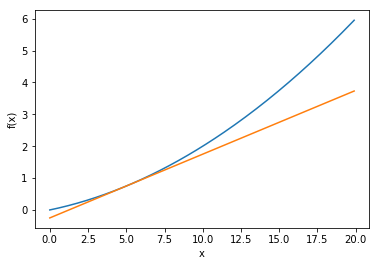

In [22]:
# coding: utf-8
import matplotlib.pylab as plt
%matplotlib inline

def function_1(x):
    return 0.01*x**2 + 0.1*x 

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 勾配

In [23]:
import numpy as np
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad

In [24]:
import numpy as np
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [25]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [26]:
import numpy as np
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [27]:
import numpy as np
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

/Users/kot/miniconda2/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


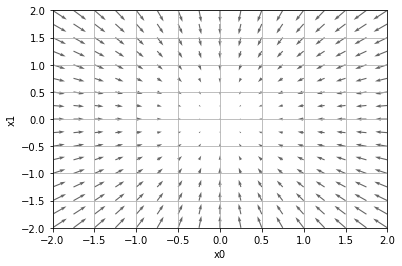

In [28]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

### 勾配法

In [29]:
import numpy as np
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

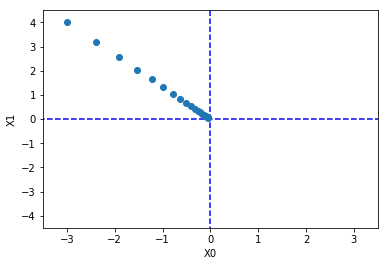

In [30]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient
%matplotlib inline

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### ニューラルネットワークに対する勾配

In [32]:
import numpy as np
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [34]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from mymodule.functions import softmax, cross_entropy_error
from mymodule.gradient import numerical_gradient

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.31623088  0.04891163 -0.36514251]
 [ 0.47434632  0.07336744 -0.54771376]]


### 2層ニューラルネットワークのクラス

In [35]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from mymodule.functions import *
from mymodule.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [37]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
x = np.random.rand(100, 784)
y = net.predict(x)
print(y)

[[ 0.10367082  0.09479027  0.09646175  0.0976099   0.09643014  0.10534564
   0.11351447  0.09714606  0.09772518  0.09730575]
 [ 0.10370514  0.09551623  0.09629093  0.09727947  0.09620149  0.10544123
   0.11376555  0.09732914  0.09752802  0.09694279]
 [ 0.10354438  0.094939    0.09638792  0.0974336   0.09647522  0.10560926
   0.11352656  0.09747596  0.09753358  0.09707453]
 [ 0.10325765  0.09473589  0.09619979  0.09781487  0.09625612  0.10613874
   0.11360267  0.09727314  0.09754611  0.09717503]
 [ 0.10336792  0.09490557  0.09612918  0.0974013   0.09657672  0.10587389
   0.11353339  0.09716664  0.09804558  0.09699981]
 [ 0.1034402   0.09517651  0.09613979  0.09748063  0.09639921  0.10576113
   0.11371928  0.097294    0.09749499  0.09709426]
 [ 0.10340416  0.09491995  0.09612156  0.09781727  0.09637837  0.10582093
   0.11315641  0.09729886  0.09782377  0.09725872]
 [ 0.1035974   0.09518469  0.09615298  0.09735027  0.09623511  0.10570848
   0.11384599  0.09747316  0.0976472   0.09680472]


In [38]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
grads = net.numerical_gradient(x, t)

In [39]:
print(grads)

{'W1': array([[  1.61360778e-04,   1.20043919e-04,   6.89253987e-05, ...,
          3.23179750e-05,  -3.51339979e-05,   1.25530821e-04],
       [  5.82171023e-05,   2.22927945e-04,   1.72836723e-05, ...,
         -6.01102079e-05,  -1.67789582e-05,   1.79360786e-04],
       [  7.19693194e-05,   1.24935289e-04,   4.59431737e-05, ...,
         -1.20054715e-04,  -1.75628645e-05,   1.29623725e-04],
       ..., 
       [  1.71491237e-04,   1.42138374e-04,   7.33165240e-05, ...,
         -5.84959436e-05,  -1.82599513e-05,   1.02064832e-04],
       [  4.22377977e-05,   1.97750258e-04,   5.48633383e-05, ...,
         -8.78759243e-05,   1.50891566e-05,   2.29489372e-04],
       [  1.76003505e-04,   5.01910957e-05,   1.11402585e-04, ...,
         -4.23339319e-05,  -5.50190982e-05,   1.33508946e-04]]), 'b1': array([  2.24106820e-04,   3.18442770e-04,   8.50670867e-05,
         5.15726128e-05,   1.02923614e-04,   1.23673527e-04,
        -2.03893740e-04,  -9.34253785e-05,  -4.90468555e-06,
         

### ミニバッチ学習の実装

__numerical_gradient を使った低速版__

In [45]:
!date
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet
%matplotlib inline
from datetime import datetime

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 30
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch) # 高速版!
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 学習経過の記録
    loss = network.loss(x_batch, t_batch)
    if i%10 == 0: print(i, loss, datetime.now().strftime("%Y/%m/%d %H:%M:%S"))
    train_loss_list.append(loss)
!date

Fri Feb  3 13:39:00 JST 2017
0 2.29433450806 2017/02/03 13:39:38
10 2.30151019526 2017/02/03 13:47:42
20 2.29443076567 2017/02/03 13:58:31
Fri Feb  3 14:07:49 JST 2017


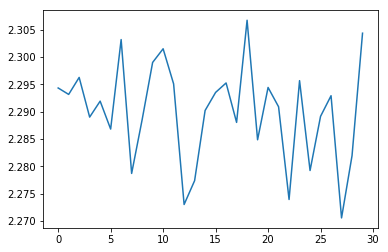

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_loss_list)
plt.show()

__gradient を使った高速版__

In [49]:
!date
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet
%matplotlib inline
from datetime import datetime

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 高速版!
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 学習経過の記録
    loss = network.loss(x_batch, t_batch)
    if i%1000 == 0: print(i, loss, datetime.now().strftime("%Y/%m/%d %H:%M:%S"))
    train_loss_list.append(loss)
!date

Fri Feb  3 14:11:27 JST 2017
0 2.29596964637 2017/02/03 14:11:28
1000 0.590789722964 2017/02/03 14:11:30
2000 0.286607804041 2017/02/03 14:11:32
3000 0.298551722558 2017/02/03 14:11:35
4000 0.289130595618 2017/02/03 14:11:39
5000 0.226502528465 2017/02/03 14:11:42
6000 0.340328112376 2017/02/03 14:11:44
7000 0.248002214471 2017/02/03 14:11:47
8000 0.158586735178 2017/02/03 14:11:50
9000 0.212563041588 2017/02/03 14:11:53
Fri Feb  3 14:11:55 JST 2017


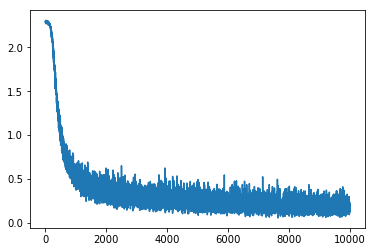

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_loss_list)
plt.show()

### テストデータで評価

train acc, test acc | 0.112366666667, 0.1135
train acc, test acc | 0.778966666667, 0.7822
train acc, test acc | 0.874666666667, 0.8781
train acc, test acc | 0.8979, 0.9006
train acc, test acc | 0.90875, 0.912
train acc, test acc | 0.91475, 0.9173
train acc, test acc | 0.919766666667, 0.9215
train acc, test acc | 0.923966666667, 0.9252
train acc, test acc | 0.92745, 0.929
train acc, test acc | 0.931683333333, 0.9332
train acc, test acc | 0.934216666667, 0.9342
train acc, test acc | 0.936783333333, 0.9356
train acc, test acc | 0.93955, 0.9385
train acc, test acc | 0.9422, 0.9388
train acc, test acc | 0.944066666667, 0.9412
train acc, test acc | 0.945466666667, 0.9421
train acc, test acc | 0.947266666667, 0.9446


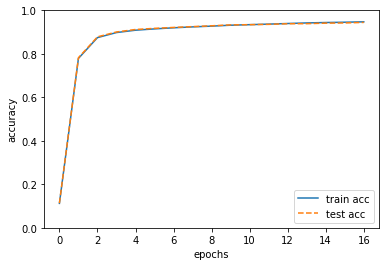

In [15]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet
%matplotlib inline

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()